## Ensembling 

[visit for more](https://www.analyticsvidhya.com/blog/2023/01/ensemble-learning-methods-bagging-boosting-and-stacking/)
## RandomForest Classifier Implementation With Pipelines And Hyperparameter Tuning

[visit for more ](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [45]:
import warnings 
warnings.filterwarnings("ignore")

In [46]:
import seaborn as  sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
df = sns.load_dataset('tips')

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

#### handling Categorical features
#### handling outliers
#### Feature scaling
#### Automating the entire

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['time'] = encoder.fit_transform(df['time'])

In [51]:
df['time'].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [52]:
X = df.drop('time', axis=1)
y = df['time']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#  The `SimpleImputer` class is used for imputing missing values in a dataset by replacing them with a specified strategy, such as mean, median, most frequent, or a constant value.
from sklearn.impute import SimpleImputer
# The `ColumnTransformer` class is used to apply different transformers to different columns in a dataset, allowing for different preprocessing steps to be applied to different subsets of features.
from sklearn.compose import ColumnTransformer
# The `Pipeline` class is used to chain multiple processing steps together, such as data preprocessing, feature selection, and model training, into a single workflow. This allows for easier and more organized data processing and model building in machine learning pipelines.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 7.0 KB


In [56]:
categorical_features = ['sex', 'smoker', 'day']
numerical_features = ['total_bill', 'tip', 'size'] 


In [57]:
numerical_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()), # StandardScaler is used to standardize the features by removing the mean and scaling to unit variance.
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('OneHotEncoder',OneHotEncoder()), # OneHotEncoder is used to encode categorical features as a one-hot numeric array.
    ]
)


In [58]:
preprocessor = ColumnTransformer([
    ('numerical',numerical_transformer,numerical_features),
    ('categorical',categorical_transformer,categorical_features),
])

In [59]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

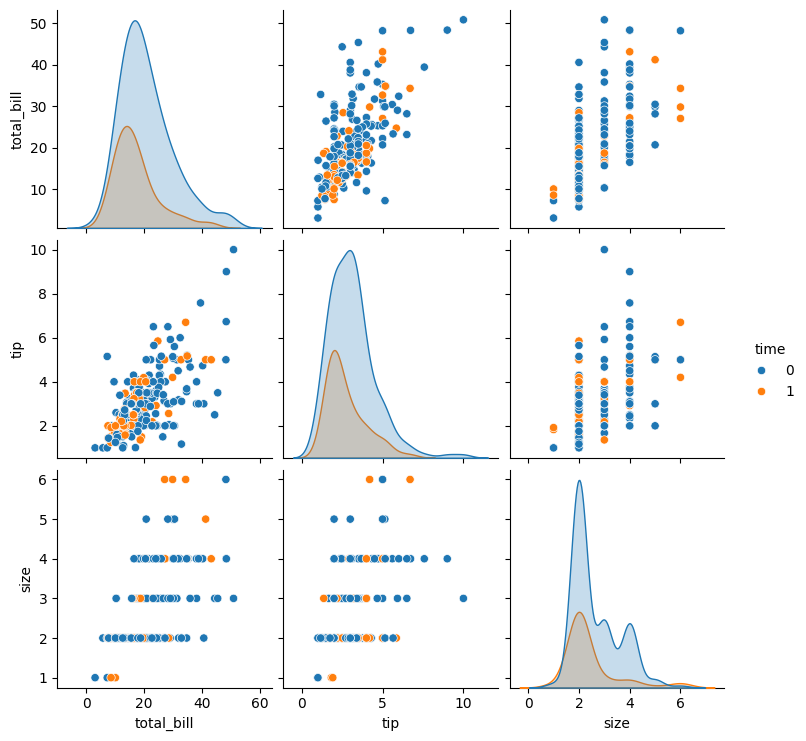

In [61]:
sns.pairplot(df, hue='time')

In [62]:
models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
}

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
def evaluate_model(models:dict,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f'{name} : {accuracy_score(y_test,y_pred)}')
        
evaluate_model(models,X_train,y_train,X_test,y_test)


RandomForestClassifier : 0.9591836734693877
DecisionTreeClassifier : 0.9387755102040817
SVC : 0.9591836734693877
GaussianNB : 0.9591836734693877
KNeighborsClassifier : 0.9183673469387755


In [68]:
classifer = RandomForestClassifier()

In [69]:
## Hyperparameter Tuning
param_grid = {
    'n_estimators':[100,200,300,400],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [70]:
# Setting `n_jobs=-1` in the `GridSearchCV` function call is telling the function to use all available CPU cores to parallelize the grid search process. This can help speed up the grid search by running multiple parameter settings in parallel.
# `scoring='accuracy'` is specifying the scoring metric that will be used to evaluate the performance of the model during the grid search process. In this case, it is using accuracy as the scoring metric, which measures the proportion of correctly classified instances out of the total instances. The grid search will aim to find the model parameters that maximize this accuracy metric.
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifer,param_grid=param_grid,cv=5,verbose=2,
scoring='accuracy',
n_jobs=-1,refit=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [71]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
clf.best_score_

0.9589743589743589

In [73]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9591836734693877